# 4.10 Coding Etiquette & Excel Reporting Part 1

# Contents:
1. Import Libraries and Data
2. Data Cleaning and Wrangling
3. Creating Columns and Flags
4. Creating High activity customers subset and exporting
5. Creating Customer Profiles
6. Aggregating customer profiles
7. Creating Visualizations
8. Exporting Visualizations
9. Exporting Data

# 1. Importing Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to Data Folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\02 Data'

In [3]:
# Import Dataframe

df = pd.read_pickle(os.path.join(path, 'prepared data', 'data merged.pkl'))

# 2. Data Cleaning and Wrangling

In [4]:
# Check

df.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,...,price_range_loc,busiest day,busiest days,Busiest hours,max_order,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443895,...,Mid range product,Regularly Busy Day,Busiest Days,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443897,...,Mid range product,Regularly Busy Day,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443898,...,Mid range product,Regularly Busy Day,Busiest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443892,...,Mid range product,Regularly Busy Day,Regularly Busy,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443893,...,Mid range product,Regularly Busy Day,Slowest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer


In [5]:
# Removing PII data: first name and last name columns from dataset

df = df.drop(['First Name', 'Last Name'], axis =1)

In [6]:
# Check for dropped columns
df.head(5)

,user_id,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,order_id,order_number,...,price_range_loc,busiest day,busiest days,Busiest hours,max_order,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,165665,443895,2543867,5,...,Mid range product,Regularly Busy Day,Busiest Days,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,165665,443897,1285508,7,...,Mid range product,Regularly Busy Day,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,165665,443898,2578584,8,...,Mid range product,Regularly Busy Day,Busiest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,165665,443892,423547,2,...,Mid range product,Regularly Busy Day,Regularly Busy,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,165665,443893,2524893,3,...,Mid range product,Regularly Busy Day,Slowest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer


# 3. Creating New columns and Flags

In [7]:
# Creating a region column

Region = []

for value in df['STATE']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']: 
        Region.append ('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        Region.append ('Midwest')
    elif value in ['Deleware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        Region.append ('South')
    else:
        Region.append ( 'West')
    



In [8]:
df['Region'] = Region

In [9]:
# Check
df['Region'].value_counts(dropna = False)

South        9600009
West         8430783
Midwest      7176924
Northeast    5422025
Name: Region, dtype: int64

In [10]:
# Creating a crosstab for region and spending flag columns
Region_Spending = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [11]:
#Check
Region_Spending

spending_flag,High Spender,Low Spender
Region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,180566,9419443
West,163760,8267023


In [12]:
# Copying to clipboard
Region_Spending.to_clipboard()

# Region 3 & 4 have the most 'High spenders' and 'Low spenders', while Regions 1 & 2 have the least 'High Spenders and 'Low spenders'

# 4. Creating High activity customers subset and exporting

In [13]:
# Customer activity flag
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'High'

In [14]:
df.loc[df['max_order'] <5, 'customer_activity'] = 'Low'

In [15]:
# Check
df['customer_activity'].value_counts(dropna = False)

High    29270938
Low      1358803
Name: customer_activity, dtype: int64

In [16]:
# High activity Subset

high_activity_customers = df[df['customer_activity'] == 'High']

In [17]:
# Check
high_activity_customers.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,order_id,order_number,...,busiest days,Busiest hours,max_order,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag,Region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,165665,443895,2543867,5,...,Busiest Days,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High
1,26711,Female,Missouri,48,1/1/2017,3,165665,443897,1285508,7,...,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High
2,26711,Female,Missouri,48,1/1/2017,3,165665,443898,2578584,8,...,Busiest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High
3,26711,Female,Missouri,48,1/1/2017,3,165665,443892,423547,2,...,Regularly Busy,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High
4,26711,Female,Missouri,48,1/1/2017,3,165665,443893,2524893,3,...,Slowest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High


In [18]:
# Export Subset
high_activity_customers.to_pickle(os.path.join(path, 'prepared data', 'high_activity_customers.pkl'))

# 5. Creating Customer Profiles

In [19]:
df['Age'].value_counts(dropna = False)

48    500821
56    498707
79    498415
31    498374
64    498028
       ...  
60    458818
65    452920
66    451409
41    447823
25    443622
Name: Age, Length: 64, dtype: int64

In [20]:
# profiling for age, creating age_flag column
df.loc[df['Age'] >= 65,'age_flag'] = 'Senior'
df.loc[(df['Age'] >= 45) & (df['Age'] < 65), 'age_flag'] = 'Middle Aged'
df.loc[(df['Age'] >= 26) & (df['Age'] < 45), 'age_flag'] = 'Adult'
df.loc[df['Age'] <26, 'age_flag'] = 'Young Adult'


In [21]:
# Check
df['age_flag'].value_counts(dropna = False)

Middle Aged    9600933
Adult          9105744
Senior         8097571
Young Adult    3825493
Name: age_flag, dtype: int64

In [22]:
# Profiling by income, creating income_flag column
df.loc[df['income'] >= 125000, 'income_flag'] = 'High Income'
df.loc[(df['income'] < 125000) & (df['income'] >= 50000), 'income_flag'] = 'Middle Income'
df.loc[df['income'] < 50000, 'income_flag'] = 'Low Income'

In [23]:
# Check
df['income_flag'].value_counts(dropna = False)

Middle Income    19078267
High Income       8163916
Low Income        3387558
Name: income_flag, dtype: int64

In [24]:
df['n_dependants'].value_counts(dropna = False)

3    7680036
2    7656940
0    7649698
1    7643067
Name: n_dependants, dtype: int64

In [25]:
# Profiling by dependants, creating family_flag column
df.loc[df['n_dependants'] >0, 'family_flag'] = 'Family'
df.loc[df['n_dependants'] == 0, 'family_flag'] = 'Single'

In [26]:
#Check
df['family_flag'].value_counts(dropna = False)

Family    22980043
Single     7649698
Name: family_flag, dtype: int64

# 6. Aggregating Customer Profiles

In [27]:
# Aggreagte by age
age_agg = df.groupby('age_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

In [28]:
#Check
age_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_flag                                                                      
Adult                          0.0  30.0  11.124272    1.0  99999.0  11.693065
Middle Aged                    0.0  30.0  11.125283    1.0  99999.0  12.294543
Senior                         0.0  30.0  11.080959    1.0  99999.0  11.610695
Young Adult                    0.0  30.0  11.103340    1.0  99999.0  12.149177

In [29]:
#Aggregate by income
income_agg = df.groupby('income_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

In [30]:
# Aggregate by dependants
family_agg = df.groupby('family_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

In [31]:
#Check
income_agg

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_flag                                                             
High Income                      0.0  30.0  11.028248    1.0  99999.0   
Low Income                       0.0  30.0  11.604677    1.0     25.0   
Middle Income                    0.0  30.0  11.058943    1.0  99999.0   

                          
                    mean  
income_flag               
High Income    21.070354  
Low Income      6.698974  
Middle Income   8.926303

In [32]:
# Check
family_agg

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
family_flag                                                                   
Family                         0.0  30.0  11.119048    1.0  99999.0  11.834785
Single                         0.0  30.0  11.084925    1.0  99999.0  12.163131

# 7. Creating Visualizations

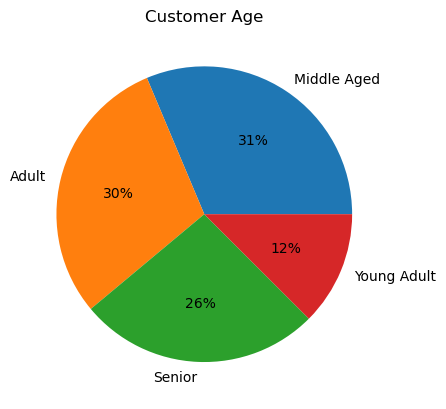

In [33]:
# Age profile Pie Chart
age_pie_chart = df['age_flag'].value_counts().plot.pie(title = 'Customer Age', label = '', autopct = '%1.f%%')

In [34]:
# age_region crosstab
Age_Region = pd.crosstab(df['Region'], df['age_flag'], dropna = False)

In [35]:
#Check
Age_Region

age_flag,Adult,Middle Aged,Senior,Young Adult
Region,,,,
Midwest,2145309,2271680,1875272,884663
Northeast,1588273,1679427,1478732,675593
South,2871841,2990914,2511181,1226073
West,2500321,2658912,2232386,1039164


In [36]:
# Copy to Clipboard
Age_Region.to_clipboard()

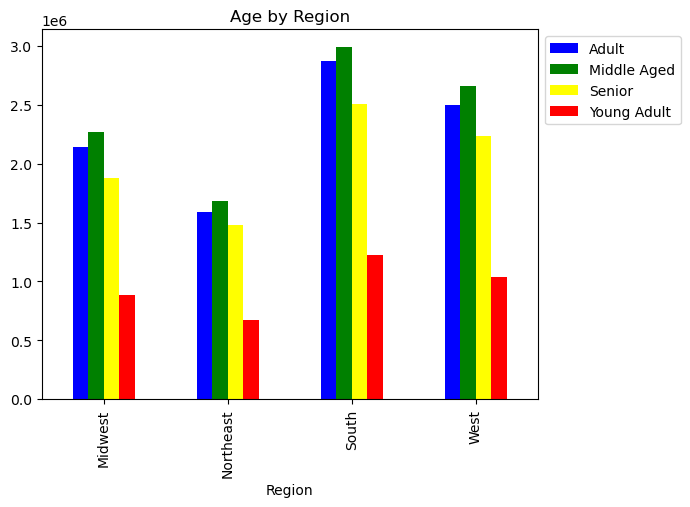

In [37]:
#Age vs Region Bar
age_region_bar = Age_Region.plot.bar(title = 'Age by Region', color = {'Young Adult': 'red', 'Adult': 'blue', 'Middle Aged': 'green', 'Senior': 'yellow'})
plt.legend(bbox_to_anchor = (1.0, 1.0))


# 8. Exporting Visualizations 

In [38]:
# path to visualizations folder

path_2 = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\Visualizations'

In [39]:
#Export age_pie_chart
age_pie_chart.figure.savefig(os.path.join(path_2, 'customer_age_pie.png'), bbox_inches = 'tight')

In [40]:
# Export age vs region bar chart
age_region_bar.figure.savefig(os.path.join(path_2, 'Age_by_region_bar.png'), bbox_inches = 'tight')

# 9. Exporting Data

In [41]:
# export data set
df.to_pickle(os.path.join(path, 'prepared data', 'merged_data_with_customer_profiles_1.pkl'))

Starting New notebook for remainder of task